In [4]:
!pip install seaborn joblib


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [45]:
# Load dataset from CSV file
df = pd.read_csv(r"C:\Users\navne\Downloads\notebooks\ad_camp\tiktok\tiktok_digital_marketing_data.csv")

In [46]:
df.head(3)

,Unnamed: 0,Hashtag,Content,Type,ContentType,UserDemographic,Likes,Shares,Comments,Views,Location,AgeGroup,Gender,PreferredMajor,InterestInScholarships,TimeSpentOnContent
0,0,#StudyTips,LiveStream,Promotional,Cooking,Alumni,103,62,194,5464,Bekasi,35-44,Male,Business,3,31
1,1,#CampusTour,Image,Engagement,IT,Parent,436,370,4,7748,Depok,35-44,Female,Law,4,49
2,2,#StudentExperience,Image,Engagement,Education,Alumni,442,58,153,9333,Depok,19-24,Female,Law,2,16


In [47]:
import pandas as pd

# Assume df is your original DataFrame
rename_map = {
    'Hashtag': 'CampaignTag',
    'Content': 'MediaFormat',
    'Type': 'MediaType',
    'ContentType': 'AudienceInterest',
    'UserDemographic': 'UserCategory',
    'Likes': 'EngagementLikes',
    'Shares': 'EngagementShares',
    'Comments': 'EngagementComments',
    'Views': 'Impressions',
    'Location': 'City',
    'AgeGroup': 'AgeRange',
    'Gender': 'Gender',
    'PreferredMajor': 'InterestMajor',
    'InterestInScholarships': 'IntentScore',
    'TimeSpentOnContent': 'EstimatedLoanDisbursal'
}

df.rename(columns=rename_map, inplace=True)


In [48]:
df.head(3)

,Unnamed: 0,CampaignTag,MediaFormat,MediaType,AudienceInterest,UserCategory,EngagementLikes,EngagementShares,EngagementComments,Impressions,City,AgeRange,Gender,InterestMajor,IntentScore,EstimatedLoanDisbursal
0,0,#StudyTips,LiveStream,Promotional,Cooking,Alumni,103,62,194,5464,Bekasi,35-44,Male,Business,3,31
1,1,#CampusTour,Image,Engagement,IT,Parent,436,370,4,7748,Depok,35-44,Female,Law,4,49
2,2,#StudentExperience,Image,Engagement,Education,Alumni,442,58,153,9333,Depok,19-24,Female,Law,2,16


In [49]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [50]:
df.isnull().sum()

CampaignTag               0
MediaFormat               0
MediaType                 0
AudienceInterest          0
UserCategory              0
EngagementLikes           0
EngagementShares          0
EngagementComments        0
Impressions               0
City                      0
AgeRange                  0
Gender                    0
InterestMajor             0
IntentScore               0
EstimatedLoanDisbursal    0
dtype: int64

In [51]:
df.dropna(inplace=True)

#handling catagorical variables
numeric_cols = ['EngagementLikes', 'EngagementShares', 'EngagementComments',
                'Impressions', 'IntentScore', 'EstimatedLoanDisbursal']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [63]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
categorical_columns = ['CampaignTag', 'MediaFormat', 'MediaType', 'AudienceInterest', 
                       'UserCategory', 'City', 'AgeRange', 'Gender', 'InterestMajor']

# Initialize label encoders
label_encoders = {col: LabelEncoder() for col in categorical_columns}

# Apply label encoding to each categorical column
for col, le in label_encoders.items():
    df[col] = le.fit_transform(df[col])

# Check the encoded data
print(df.head())


   CampaignTag  MediaFormat  MediaType  AudienceInterest  UserCategory  \
0            4            1          2                 2             0   
1            0            0          0                 6             3   
2            3            0          0                 4             0   
3            3            3          0                 6             2   
4            1            2          1                 4             0   

   EngagementLikes  EngagementShares  EngagementComments  Impressions  City  \
0              103                62                 194         5464     1   
1              436               370                   4         7748     2   
2              442                58                 153         9333     2   
3              271               189                 176          582     1   
4              107               337                  26         5648     1   

   AgeRange  Gender  InterestMajor  IntentScore  EstimatedLoanDisbursal  
0     

In [62]:
print(df.columns)

Index(['CampaignTag', 'MediaFormat', 'MediaType', 'AudienceInterest',
       'UserCategory', 'EngagementLikes', 'EngagementShares',
       'EngagementComments', 'Impressions', 'City', 'AgeRange', 'Gender',
       'InterestMajor', 'IntentScore', 'EstimatedLoanDisbursal'],
      dtype='object')


In [64]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Initialize a dictionary to store label encoders
label_encoders = {}

# Define categorical columns
categorical_columns = ['CampaignTag', 'MediaFormat', 'MediaType', 'AudienceInterest', 'UserCategory', 
                       'City', 'AgeRange', 'Gender', 'InterestMajor']

# Apply label encoding to each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Transform the column
    label_encoders[col] = le  # Store the encoder

# Save the label encoders
joblib.dump(label_encoders, r'C:\Users\navne\Downloads\notebooks\ad_camp\tiktok\label_encoders.joblib')


['C:\\Users\\navne\\Downloads\\notebooks\\ad_camp\\tiktok\\label_encoders.joblib']

#one hot encoding
df = pd.get_dummies(df, columns=[
    'CampaignTag', 'MediaFormat', 'MediaType', 'AudienceInterest',
    'UserCategory', 'City', 'AgeRange', 'Gender', 'InterestMajor'
], drop_first=True)

In [54]:
df.head(2)

,CampaignTag,MediaFormat,MediaType,AudienceInterest,UserCategory,EngagementLikes,EngagementShares,EngagementComments,Impressions,City,AgeRange,Gender,InterestMajor,IntentScore,EstimatedLoanDisbursal
0,4,1,2,2,0,103,62,194,5464,1,3,1,1,3,31
1,0,0,0,6,3,436,370,4,7748,2,3,0,3,4,49


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Features and target
X = df.drop('EstimatedLoanDisbursal', axis=1)
y = df['EstimatedLoanDisbursal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R² Score: {r2}')


MSE: 263.0087472417326
MAE: 13.82991972366239
R² Score: 0.02063251816086542


In [57]:
# Reverse encoding example (for predicted value or user input):
def reverse_label_encoding(col, value):
    return label_encoders[col].inverse_transform([value])[0]

# Example: if you want to show the original "CampaignTag" for the label 0
original_campaign_tag = reverse_label_encoding('CampaignTag', 0)
print(f"Original CampaignTag: {original_campaign_tag}")


Original CampaignTag: #CampusTour


In [60]:
import joblib

# Assuming 'reg' is your trained regression model
model_path = r'C:\Users\navne\Downloads\notebooks\ad_camp\tiktok\regression_model.joblib'

# Save the model to the specified path
joblib.dump(reg, model_path)

print(f"Model saved at {model_path}")


Model saved at C:\Users\navne\Downloads\notebooks\ad_camp\tiktok\regression_model.joblib


# Feature Analysis

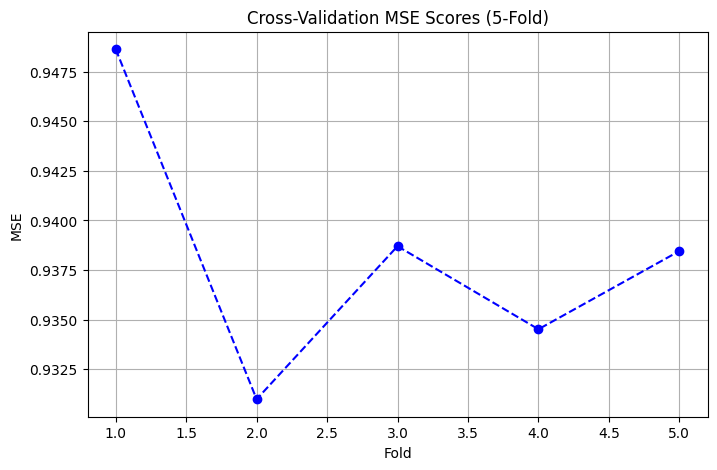

Average CV MSE: 0.9382604371191459


In [35]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Get negative MSE scores (we take -1 * score because scikit-learn returns negative MSE)
cv_scores = cross_val_score(reg, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_scores

# Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, 6), cv_mse_scores, marker='o', linestyle='--', color='blue')
plt.title('Cross-Validation MSE Scores (5-Fold)')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

print("Average CV MSE:", np.mean(cv_mse_scores))


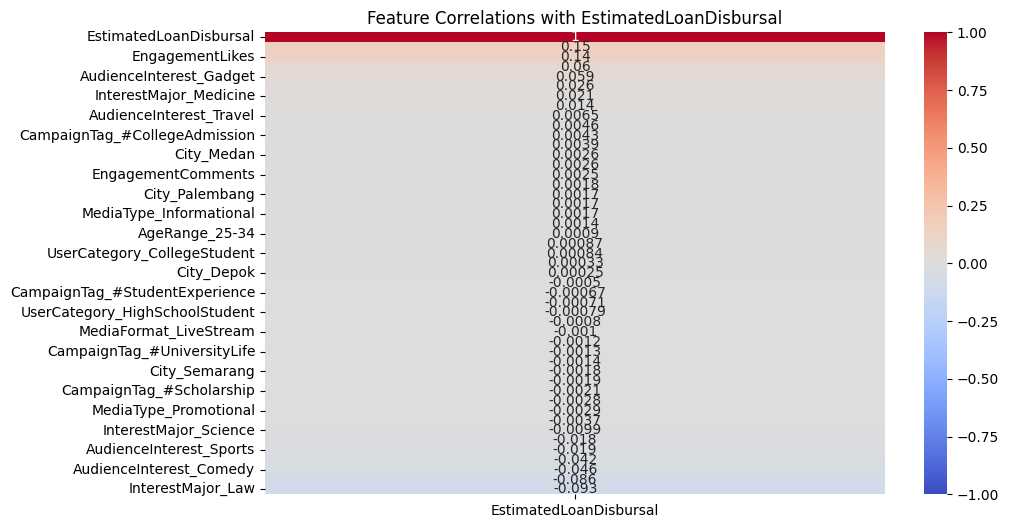

In [36]:
import seaborn as sns

# Combine features and target for correlation
df_corr = df.copy()
corr_matrix = df_corr.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix[['EstimatedLoanDisbursal']].sort_values(by='EstimatedLoanDisbursal', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlations with EstimatedLoanDisbursal')
plt.show()


C:\Users\navne\AppData\Local\Temp\ipykernel_17980\4082208426.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AggregatedImportance', y='OriginalFeature', data=agg_df.head(15), palette='magma')


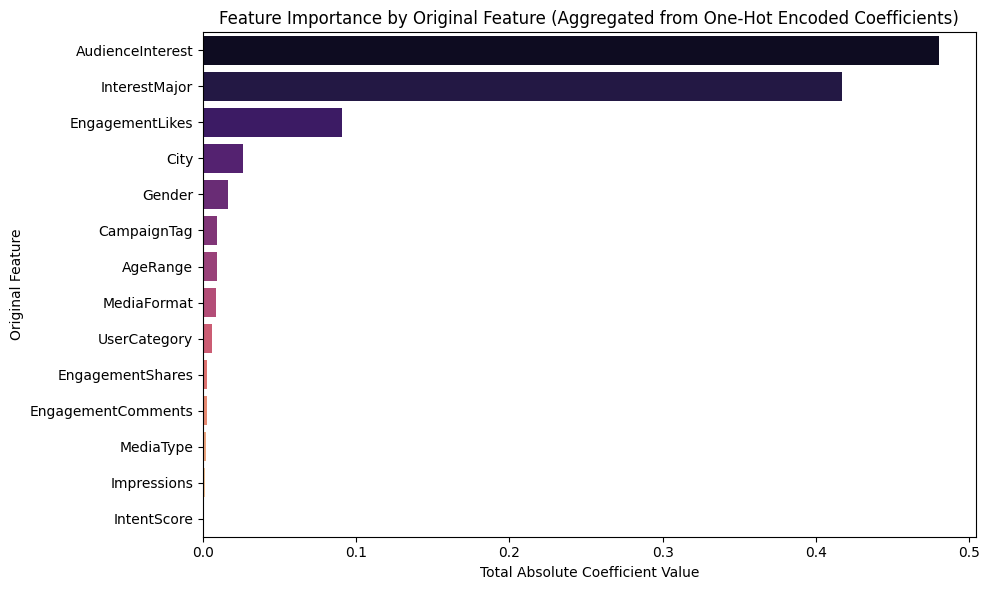

In [41]:
# Assume you used pd.get_dummies(df, columns=['Gender', 'Location', ...])
# Get original column groups (based on prefixes from one-hot encoding)
original_features = {}

for col in X.columns:
    # Get prefix before first underscore
    key = col.split('_')[0]
    original_features.setdefault(key, []).append(col)




# Now sum absolute coefficient contributions per original feature
import numpy as np

aggregated_importance = []

for key, cols in original_features.items():
    indices = [X.columns.get_loc(col) for col in cols if col in X.columns]
    total_importance = sum(np.abs(coefs[i]) for i in indices)
    aggregated_importance.append((key, total_importance))

# Convert to DataFrame and sort
agg_df = pd.DataFrame(aggregated_importance, columns=['OriginalFeature', 'AggregatedImportance'])
agg_df = agg_df.sort_values(by='AggregatedImportance', ascending=False)




import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='AggregatedImportance', y='OriginalFeature', data=agg_df.head(15), palette='magma')
plt.title('Feature Importance by Original Feature (Aggregated from One-Hot Encoded Coefficients)')
plt.xlabel('Total Absolute Coefficient Value')
plt.ylabel('Original Feature')
plt.tight_layout()
plt.show()


# Streamlit

In [59]:
import streamlit as st

# Example: After prediction, you might want to display the result with original labels
st.write("Predicted Estimated Loan Disbursal:", y_pred[0])

# If you want to display the predicted categories back to the user
original_campaign_tag = reverse_label_encoding('CampaignTag', X_test.iloc[0]['CampaignTag'])
st.write("Original CampaignTag:", original_campaign_tag)


2025-05-05 16:41:07.302 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-05 16:41:07.374 
  command:

    streamlit run C:\Users\navne\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-05 16:41:07.374 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-05 16:41:07.375 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-05 16:41:07.375 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-05 16:41:07.376 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-05 16:41:07.377 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-05 16:41: